In [1]:
import findspark
findspark.init()
import pyspark
import pandas as pd
import seaborn as sns # To get graphs
import matplotlib.pyplot as plt # To get graphs

In [2]:
#### First we have create a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('spark_session') \
                    .getOrCreate()

In [3]:
spark

### Import the Dataset

In [4]:
#df = spark.read.option("header" , True).csv("D:\\Vizuamatix exam\\final_dispatch.csv")
df = spark.read.option("header" , True).csv("/Users/Asus/Documents/InternCsv/combine_final.csv")

In [5]:
#df = df.drop("_c0")
df.show()

+-------------+--------+----+---------------+-------------------+----------+
|        Plant|    Date|Time|Actual_Dispatch|Forecasted_Dispatch|Difference|
+-------------+--------+----+---------------+-------------------+----------+
| ALTAQQA-Pol.|7/1/2020|0:00|              0|                  0|         0|
|         Bowa|7/1/2020|0:00|              0|                  0|         0|
|     KPS(GT7)|7/1/2020|0:00|              0|                  0|         0|
|         Polp|7/1/2020|0:00|             40|                 78|       -38|
|          WPS|7/1/2020|0:00|              0|                  0|         0|
|         Rand|7/1/2020|0:00|              0|                  0|         0|
|VPOWER Horona|7/1/2020|0:00|              0|                  0|         0|
|       LVPS 2|7/1/2020|0:00|            540|                270|       270|
|          Uku|7/1/2020|0:00|             72|                 40|        32|
|   ACE Matara|7/1/2020|0:00|              0|                  0|         0|

In [6]:
from pyspark.sql.functions import percent_rank
from pyspark.sql import Window
df_dev = df.withColumn("rank", percent_rank().over(Window.partitionBy().orderBy("Date","Time","Plant")))

In [7]:
train_df = df_dev.where("rank <= .8").drop("rank")
train_df.show()

+-------------+--------+----+---------------+-------------------+----------+
|        Plant|    Date|Time|Actual_Dispatch|Forecasted_Dispatch|Difference|
+-------------+--------+----+---------------+-------------------+----------+
|     ACE EMBP|7/1/2020|0:00|              0|                 51|       -51|
|   ACE Matara|7/1/2020|0:00|              0|                  0|         0|
|ALTAQQA-Mahi.|7/1/2020|0:00|              0|                  0|         0|
| ALTAQQA-Pol.|7/1/2020|0:00|              0|                  0|         0|
|   Asia Power|7/1/2020|0:00|              0|                 33|       -33|
|        Barge|7/1/2020|0:00|             90|                 45|        45|
|         Bowa|7/1/2020|0:00|              0|                  0|         0|
|CEB Sup Power|7/1/2020|0:00|              0|                  0|         0|
|       Canyon|7/1/2020|0:00|             20|                  0|        20|
|         KCCP|7/1/2020|0:00|              0|                  0|         0|

In [10]:
train_df.describe().show()

+-------+--------+---------+-----+-----------------+-------------------+------------------+
|summary|   Plant|     Date| Time|  Actual_Dispatch|Forecasted_Dispatch|        Difference|
+-------+--------+---------+-----+-----------------+-------------------+------------------+
|  count|   37133|    37133|37133|            37133|              37133|             37133|
|   mean|    null|     null| null|92.94931731882691| 47.471440497670535|45.477876821156386|
| stddev|    null|     null| null|160.7365096558185|  80.77199237215832| 86.27204626475564|
|    min|ACE EMBP| 7/1/2020| 0:00|               -1|                  0|                -1|
|    max|     WPS|7/29/2020| 9:30|               99|                 99|                99|
+-------+--------+---------+-----+-----------------+-------------------+------------------+



In [11]:
test_df = df_dev.where("rank > .8").drop("rank")
test_df.show()

+--------------+---------+-----+---------------+-------------------+----------+
|         Plant|     Date| Time|Actual_Dispatch|Forecasted_Dispatch|Difference|
+--------------+---------+-----+---------------+-------------------+----------+
|          Nlax|7/29/2020|21:30|            152|                 20|       132|
|          Olax|7/29/2020|21:30|            102|                 10|        92|
|          Polp|7/29/2020|21:30|            176|                 60|       116|
|          Rand|7/29/2020|21:30|              0|                  0|         0|
|          Rant|7/29/2020|21:30|              0|                  0|         0|
|           Sam|7/29/2020|21:30|              0|                  0|         0|
|        Sapu A|7/29/2020|21:30|             61|                 36|        25|
|        Sapu B|7/29/2020|21:30|            136|                 66|        70|
|    Sojitz CCP|7/29/2020|21:30|              0|                163|      -163|
|           Uku|7/29/2020|21:30|        

In [12]:
test_df.describe().show()

+-------+--------+---------+----+------------------+-------------------+-----------------+
|summary|   Plant|     Date|Time|   Actual_Dispatch|Forecasted_Dispatch|       Difference|
+-------+--------+---------+----+------------------+-------------------+-----------------+
|  count|    9283|     9283|9283|              9283|               9283|             9283|
|   mean|    null|     null|null| 97.63373909296564| 48.889798556501134|48.74394053646451|
| stddev|    null|     null|null|155.28620999614313|    78.814074198326|83.86784344072188|
|    min|ACE EMBP|7/29/2020|0:00|                -2|                  0|               -1|
|    max|     WPS| 7/9/2020|9:30|                99|                 99|               99|
+-------+--------+---------+----+------------------+-------------------+-----------------+



In [15]:
train_df = train_df.withColumn("Difference",train_df.Difference.cast('double'))

In [20]:
train_df = train_df.withColumn("Actual_Dispatch",train_df.Actual_Dispatch.cast('double'))

In [21]:
train_df = train_df.withColumn("Forecasted_Dispatch",train_df.Forecasted_Dispatch.cast('double'))

In [22]:
train_df.dtypes

[('Plant', 'string'),
 ('Date', 'string'),
 ('Time', 'string'),
 ('Actual_Dispatch', 'double'),
 ('Forecasted_Dispatch', 'double'),
 ('Difference', 'double'),
 ('Dis_Actual', 'double'),
 ('Dis_Forcst', 'double')]

### Time series data analysis - Daily

#### 1.1) Total Actual Dispatches Daily

In [23]:
from pyspark.sql.functions import col

In [24]:
sum1 = train_df.groupBy("Date").sum("Dis_Actual","Dis_Forcst","difference").sort(col("Date").asc())

In [25]:
sum1.show(30)

+---------+---------------+---------------+---------------+
|     Date|sum(Dis_Actual)|sum(Dis_Forcst)|sum(difference)|
+---------+---------------+---------------+---------------+
| 7/1/2020|       164394.0|        86666.0|        77728.0|
|7/10/2020|       168756.0|        84202.0|        84554.0|
|7/11/2020|       150952.0|        80095.0|        70857.0|
|7/12/2020|       133281.0|        69588.0|        63693.0|
|7/13/2020|       163359.0|        82308.0|        81051.0|
|7/14/2020|       173932.0|        87793.0|        86139.0|
|7/15/2020|       171561.0|        87663.0|        83898.0|
|7/16/2020|       165218.0|        85969.0|        79249.0|
|7/17/2020|       165218.0|        82911.0|        82307.0|
|7/18/2020|       159815.0|        82847.0|        76968.0|
|7/19/2020|       140516.0|        67697.0|        72819.0|
| 7/2/2020|       161345.0|        83312.0|        78033.0|
|7/20/2020|       150243.0|        82204.0|        68039.0|
|7/21/2020|       159014.0|        81733

In [26]:
df1 = sum1.toPandas()
df1.head()

Date  sum(Dis_Actual)  sum(Dis_Forcst)  sum(difference)
0   7/1/2020         164394.0          86666.0          77728.0
1  7/10/2020         168756.0          84202.0          84554.0
2  7/11/2020         150952.0          80095.0          70857.0
3  7/12/2020         133281.0          69588.0          63693.0
4  7/13/2020         163359.0          82308.0          81051.0

In [27]:
df1.dtypes

Date                object
sum(Dis_Actual)    float64
sum(Dis_Forcst)    float64
sum(difference)    float64
dtype: object

In [28]:
df1["Date"] = pd.to_datetime(df1["Date"]) # Convert Date into datetime format

In [29]:
df1.dtypes

Date               datetime64[ns]
sum(Dis_Actual)           float64
sum(Dis_Forcst)           float64
sum(difference)           float64
dtype: object

([<matplotlib.axis.XTick at 0x13cb0f51dc0>,
 [Text(0, 0, '07-01'),
  Text(1, 0, '07-02'),
  Text(2, 0, '07-03'),
  Text(3, 0, '07-06'),
  Text(4, 0, '07-07'),
  Text(5, 0, '07-08'),
  Text(6, 0, '07-09'),
  Text(7, 0, '07-10'),
  Text(8, 0, '07-11'),
  Text(9, 0, '07-12'),
  Text(10, 0, '07-13'),
  Text(11, 0, '07-14'),
  Text(12, 0, '07-15'),
  Text(13, 0, '07-16'),
  Text(14, 0, '07-17'),
  Text(15, 0, '07-18'),
  Text(16, 0, '07-19'),
  Text(17, 0, '07-20'),
  Text(18, 0, '07-21'),
  Text(19, 0, '07-22'),
  Text(20, 0, '07-23'),
  Text(21, 0, '07-24')])

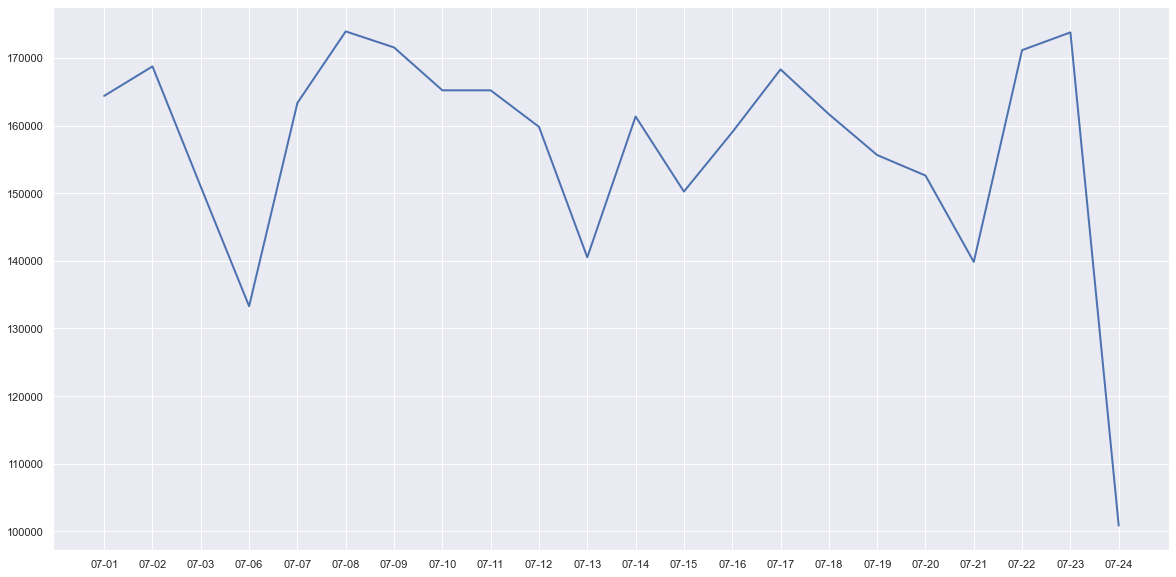

In [30]:
from pyspark.sql.functions import *
sns.set(rc={'figure.figsize':(20, 10)})
df1['sum(Dis_Actual)'].plot(linewidth=2)
positions = (0,1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21)
labels = ("07-01", "07-02", "07-03","07-06","07-07","07-08","07-09","07-10","07-11","07-12","07-13","07-14","07-15","07-16","07-17","07-18","07-19","07-20","07-21","07-22","07-23","07-24")
plt.xticks(positions, labels)

* Cannot see a specific pattern here
* But when month goes, total dispatch per day tend to decrese ( Not very much significantly )
* Lowest Total actual dispatch in last day ( july - 24)

#### 1.2) Total Forecast Dispatches Daily

([<matplotlib.axis.XTick at 0x13cb209fc70>,
 [Text(0, 0, '07-01'),
  Text(1, 0, '07-02'),
  Text(2, 0, '07-03'),
  Text(3, 0, '07-06'),
  Text(4, 0, '07-07'),
  Text(5, 0, '07-08'),
  Text(6, 0, '07-09'),
  Text(7, 0, '07-10'),
  Text(8, 0, '07-11'),
  Text(9, 0, '07-12'),
  Text(10, 0, '07-13'),
  Text(11, 0, '07-14'),
  Text(12, 0, '07-15'),
  Text(13, 0, '07-16'),
  Text(14, 0, '07-17'),
  Text(15, 0, '07-18'),
  Text(16, 0, '07-19'),
  Text(17, 0, '07-20'),
  Text(18, 0, '07-21'),
  Text(19, 0, '07-22'),
  Text(20, 0, '07-23'),
  Text(21, 0, '07-24')])

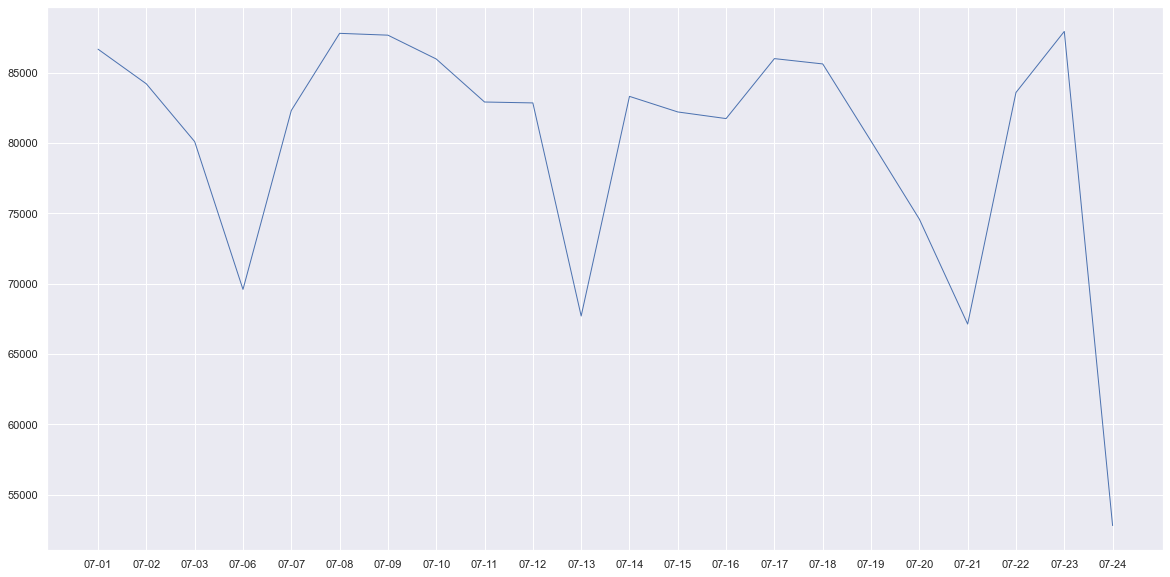

In [31]:
df1['sum(Dis_Forcst)'].plot(linewidth=1);
positions = (0,1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21)
labels = ("07-01", "07-02", "07-03","07-06","07-07","07-08","07-09","07-10","07-11","07-12","07-13","07-14","07-15","07-16","07-17","07-18","07-19","07-20","07-21","07-22","07-23","07-24")
plt.xticks(positions, labels)

#### 1.3) Difference of Total Dispatches Daily

([<matplotlib.axis.XTick at 0x13cb16fc040>,
 [Text(0, 0, '07-01'),
  Text(1, 0, '07-02'),
  Text(2, 0, '07-03'),
  Text(3, 0, '07-06'),
  Text(4, 0, '07-07'),
  Text(5, 0, '07-08'),
  Text(6, 0, '07-09'),
  Text(7, 0, '07-10'),
  Text(8, 0, '07-11'),
  Text(9, 0, '07-12'),
  Text(10, 0, '07-13'),
  Text(11, 0, '07-14'),
  Text(12, 0, '07-15'),
  Text(13, 0, '07-16'),
  Text(14, 0, '07-17'),
  Text(15, 0, '07-18'),
  Text(16, 0, '07-19'),
  Text(17, 0, '07-20'),
  Text(18, 0, '07-21'),
  Text(19, 0, '07-22'),
  Text(20, 0, '07-23'),
  Text(21, 0, '07-24')])

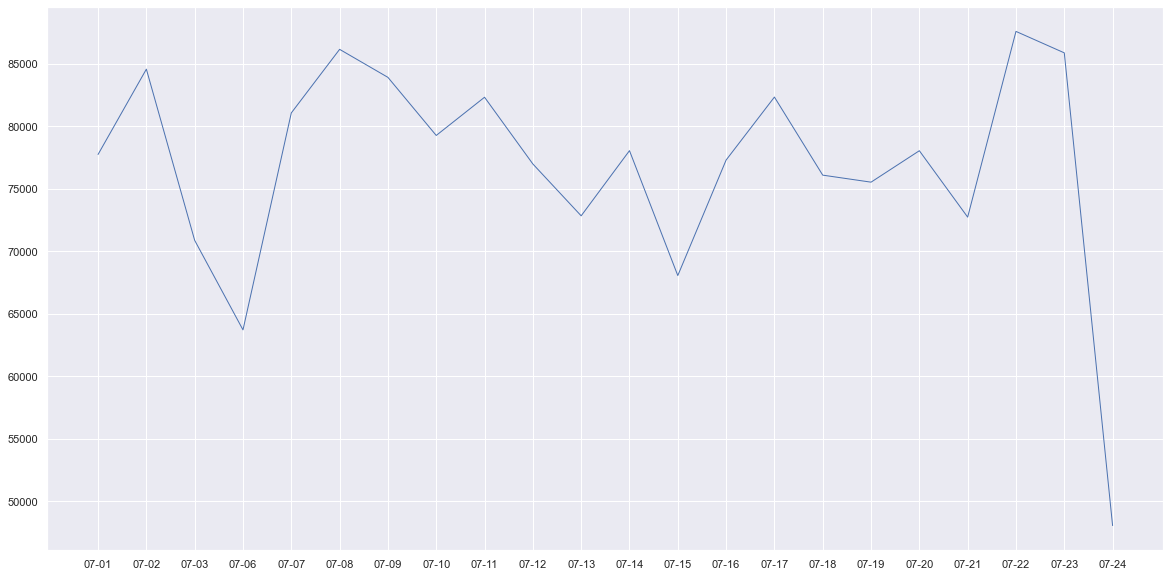

In [32]:
df1['sum(difference)'].plot(linewidth=1);
positions = (0,1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21)
labels = ("07-01", "07-02", "07-03","07-06","07-07","07-08","07-09","07-10","07-11","07-12","07-13","07-14","07-15","07-16","07-17","07-18","07-19","07-20","07-21","07-22","07-23","07-24")
plt.xticks(positions, labels)

([<matplotlib.axis.XTick at 0x13cb0ee76a0>,
 [Text(0, 0, '07-01'),
  Text(1, 0, '07-02'),
  Text(2, 0, '07-03'),
  Text(3, 0, '07-06'),
  Text(4, 0, '07-07'),
  Text(5, 0, '07-08'),
  Text(6, 0, '07-09'),
  Text(7, 0, '07-10'),
  Text(8, 0, '07-11'),
  Text(9, 0, '07-12'),
  Text(10, 0, '07-13'),
  Text(11, 0, '07-14'),
  Text(12, 0, '07-15'),
  Text(13, 0, '07-16'),
  Text(14, 0, '07-17'),
  Text(15, 0, '07-18'),
  Text(16, 0, '07-19'),
  Text(17, 0, '07-20'),
  Text(18, 0, '07-21'),
  Text(19, 0, '07-22'),
  Text(20, 0, '07-23'),
  Text(21, 0, '07-24')])

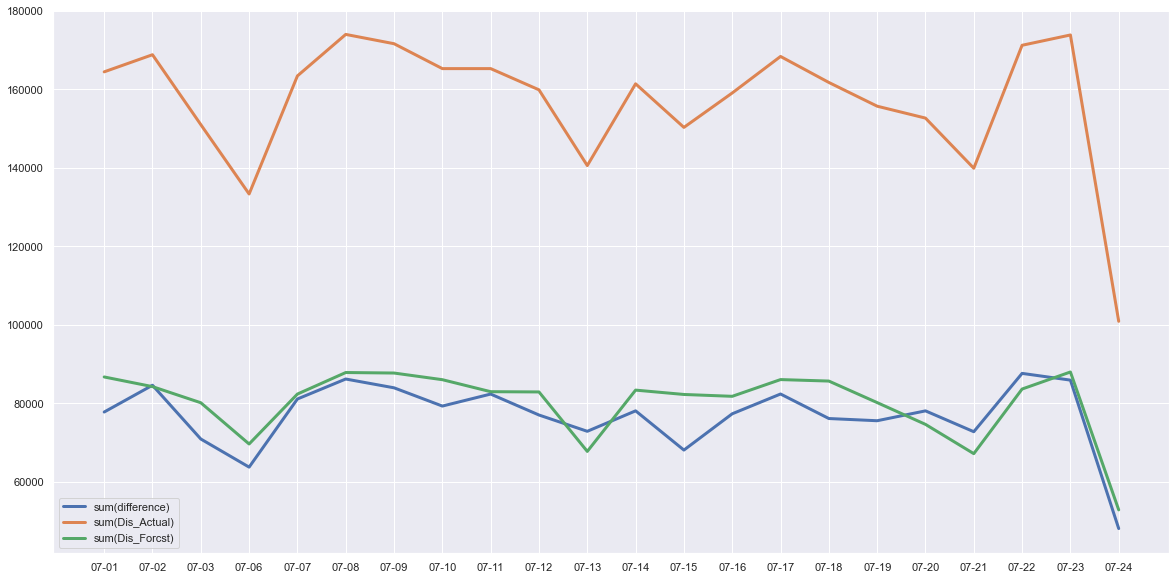

In [33]:
df1[['sum(difference)','sum(Dis_Actual)','sum(Dis_Forcst)']].plot(linewidth=3);
positions = (0,1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21)
labels = ("07-01", "07-02", "07-03","07-06","07-07","07-08","07-09","07-10","07-11","07-12","07-13","07-14","07-15","07-16","07-17","07-18","07-19","07-20","07-21","07-22","07-23","07-24")
plt.xticks(positions, labels)

#### 2.1) Total Actual Dispatch for every day ( Plant - wise)

In [34]:
sum2 = train_df.groupBy("Plant","Date").sum("Dis_Actual","Dis_Forcst","difference").sort(col("Date").asc() , col("Plant").asc())

In [35]:
sum2.describe().show()

+-------+--------+---------+-----------------+-----------------+-----------------+
|summary|   Plant|     Date|  sum(Dis_Actual)|  sum(Dis_Forcst)|  sum(difference)|
+-------+--------+---------+-----------------+-----------------+-----------------+
|  count|     789|      789|              789|              789|              789|
|   mean|    null|     null|4374.508238276299|2234.166032953105|2140.342205323194|
| stddev|    null|     null|7404.245599996776|3706.974569435119|3794.084902946587|
|    min|ACE EMBP| 7/1/2020|              0.0|              0.0|          -5930.0|
|    max|     WPS|7/29/2020|          26806.0|          12960.0|          14454.0|
+-------+--------+---------+-----------------+-----------------+-----------------+



In [36]:
df_sum2 = sum2.toPandas()

In [37]:
df_sum2["Date"] = pd.to_datetime(df_sum2["Date"])

In [38]:
df_sum2.dtypes

Plant                      object
Date               datetime64[ns]
sum(Dis_Actual)           float64
sum(Dis_Forcst)           float64
sum(difference)           float64
dtype: object

In [39]:
df_sum2

Plant       Date  sum(Dis_Actual)  sum(Dis_Forcst)  \
0         ACE EMBP 2020-07-01           6679.0           3932.0   
1       ACE Matara 2020-07-01           1512.0            920.0   
2    ALTAQQA-Mahi. 2020-07-01              0.0            320.0   
3     ALTAQQA-Pol. 2020-07-01              0.0            256.0   
4       Asia Power 2020-07-01           2875.0           1917.0   
..             ...        ...              ...              ...   
784  VPOWER Horona 2020-07-29              0.0              0.0   
785  VPOWER Palle. 2020-07-29              0.0              0.0   
786           Vict 2020-07-29           1234.0           1042.0   
787            WCP 2020-07-29          14201.0           7290.0   
788            WPS 2020-07-29              0.0            379.0   

     sum(difference)  
0             2747.0  
1              592.0  
2             -320.0  
3             -256.0  
4              958.0  
..               ...  
784              0.0  
785              0.0  
786            192.0  
787           6911.0  
788           -379.0  

[789 rows x 5 columns]

In [40]:
data1 = df_sum2.pivot(index="Date", columns="Plant", values="sum(Dis_Actual)")

In [41]:
data1

Plant       ACE EMBP  ACE Matara  ALTAQQA-Mahi.  ALTAQQA-Pol.  Asia Power  \
Date                                                                        
2020-07-01    6679.0      1512.0            0.0           0.0      2875.0   
2020-07-02    6845.0      1368.0            0.0           0.0      2597.0   
2020-07-10    6278.0      1128.0            0.0           0.0      2125.0   
2020-07-11    6363.0         0.0            0.0           0.0       572.0   
2020-07-12       0.0         0.0            0.0           0.0         0.0   
2020-07-13    6673.0      1704.0          530.0         448.0      2888.0   
2020-07-14    7973.0      1764.0          121.0         560.0      3548.0   
2020-07-15    7351.0      1680.0            0.0           0.0      1390.0   
2020-07-16    6875.0      1632.0            0.0           0.0      1285.0   
2020-07-17    6875.0      1632.0            0.0           0.0      1285.0   
2020-07-18    6758.0      1488.0            0.0           0.0      1903.0   
2020-07-19    4407.0       624.0            0.0           0.0         0.0   
2020-07-20    4918.0       864.0            0.0           0.0       646.0   
2020-07-21    6453.0      1426.0            0.0           0.0      1480.0   
2020-07-22    6515.0      1584.0           40.0          56.0      2335.0   
2020-07-23    6242.0      1512.0            0.0           0.0      1864.0   
2020-07-24    6728.0      1656.0            0.0           0.0      2232.0   
2020-07-25    6226.0      1412.0            0.0           0.0        20.0   
2020-07-26    6058.0         0.0            0.0           0.0         0.0   
2020-07-27    6893.0      1728.0          220.0         192.0      2295.0   
2020-07-28    7232.0      1680.0          540.0         400.0      2481.0   
2020-07-29    4067.0       936.0            0.0           0.0       692.0   

Plant        Barge    Bowa  CEB Sup Power  Canyon  KCCP  ...     Uku  \
Date                                                     ...           
2020-07-01  4505.0   773.0            0.0  1697.0   0.0  ...  2960.0   
2020-07-02  5096.0  1431.0            0.0  1622.0   0.0  ...  2895.0   
2020-07-10  4519.0  1005.0            0.0  2057.0   0.0  ...  2824.0   
2020-07-11  4773.0   785.0          272.0  1435.0   0.0  ...  2634.0   
2020-07-12  4709.0   615.0            0.0  1222.0   0.0  ...   940.0   
2020-07-13  5447.0   782.0         2062.0  1365.0   0.0  ...  2514.0   
2020-07-14  5808.0   922.0         2352.0  1478.0   0.0  ...  2741.0   
2020-07-15  4994.0   801.0          466.0  1728.0   0.0  ...  2788.0   
2020-07-16  4202.0   785.0            0.0   690.0   0.0  ...  2434.0   
2020-07-17  4202.0   785.0            0.0   690.0   0.0  ...  2434.0   
2020-07-18  5326.0   918.0            0.0   877.0   0.0  ...  2528.0   
2020-07-19  5503.0  1063.0            0.0   853.0   0.0  ...   884.0   
2020-07-20  4825.0   743.0            0.0   717.0   0.0  ...  2893.0   
2020-07-21  5349.0  1163.0            0.0  1565.0   0.0  ...  2607.0   
2020-07-22  5313.0   825.0            0.0  1307.0   0.0  ...  1696.0   
2020-07-23  4042.0   707.0            0.0   742.0   0.0  ...  2478.0   
2020-07-24  4572.0   851.0            0.0  1105.0   0.0  ...  2131.0   
2020-07-25  5532.0   894.0            0.0  1373.0   0.0  ...  2370.0   
2020-07-26  5578.0   696.0            0.0   704.0   0.0  ...  2484.0   
2020-07-27  5494.0   658.0          788.0  1560.0   0.0  ...  2322.0   
2020-07-28  5469.0   844.0         1980.0  1068.0   0.0  ...  2322.0   
2020-07-29  2568.0   672.0            0.0   213.0   0.0  ...  1657.0   

Plant       Upper Kothmale  Uthuru Janani  VPOWER Galle  VPOWER Hamb.  \
Date                                                                    
2020-07-01          1389.0         1344.0           NaN           0.0   
2020-07-02          4424.0         1367.0           NaN           0.0   
2020-07-10          2132.0         1515.0           0.0           0.0   
2020-07-11          1957.0          771.0           NaN  

In [42]:
data1.columns

Index(['ACE EMBP', 'ACE Matara', 'ALTAQQA-Mahi.', 'ALTAQQA-Pol.', 'Asia Power',
       'Barge', 'Bowa', 'CEB Sup Power', 'Canyon', 'KCCP', 'KPS(GT)',
       'KPS(GT7)', 'Koth', 'Kukule', 'LVPS 1', 'LVPS 2', 'LVPS 3', 'Nlax',
       'Olax', 'Polp', 'Rand', 'Rant', 'Sam', 'Sapu A', 'Sapu B', 'Sojitz CCP',
       'Uku', 'Upper Kothmale', 'Uthuru Janani', 'VPOWER Galle',
       'VPOWER Hamb.', 'VPOWER Horona', 'VPOWER Palle.', 'Vict', 'WCP', 'WPS'],
      dtype='object', name='Plant')

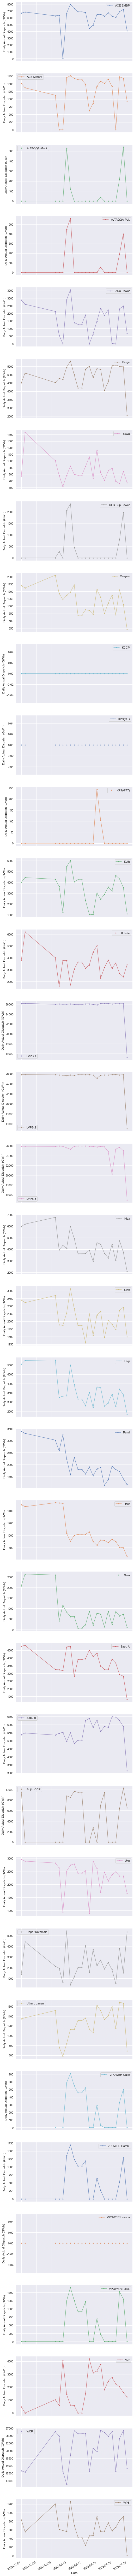

In [43]:
cols_plot = ['ACE EMBP', 'ACE Matara', 'ALTAQQA-Mahi.', 'ALTAQQA-Pol.', 'Asia Power',
       'Barge', 'Bowa', 'CEB Sup Power', 'Canyon', 'KCCP', 'KPS(GT)',
       'KPS(GT7)', 'Koth', 'Kukule', 'LVPS 1', 'LVPS 2', 'LVPS 3', 'Nlax',
       'Olax', 'Polp', 'Rand', 'Rant', 'Sam', 'Sapu A', 'Sapu B', 'Sojitz CCP',
       'Uku', 'Upper Kothmale', 'Uthuru Janani', 'VPOWER Galle',
       'VPOWER Hamb.', 'VPOWER Horona', 'VPOWER Palle.', 'Vict', 'WCP', 'WPS']
axes = data1[cols_plot].plot(marker='.', alpha=0.7, linestyle='-', figsize=(8, 200), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Actual Dispatch (GWh)')

#### 2.2) Total Forecast Dispatch for every day ( Plant - wise)

In [44]:
data2 = df_sum2.pivot(index="Date", columns="Plant", values="sum(Dis_Forcst)")
data2

Plant       ACE EMBP  ACE Matara  ALTAQQA-Mahi.  ALTAQQA-Pol.  Asia Power  \
Date                                                                        
2020-07-01    3932.0       920.0          320.0         256.0      1917.0   
2020-07-02    3304.0       847.0            0.0           0.0      1826.0   
2020-07-10    1439.0         0.0            0.0           0.0         0.0   
2020-07-11    3386.0       576.0            0.0           0.0         0.0   
2020-07-12    2109.0        48.0            0.0           0.0         0.0   
2020-07-13    3149.0       808.0            0.0           0.0      1464.0   
2020-07-14    3961.0      1088.0          330.0         272.0      1951.0   
2020-07-15    3369.0       937.0            0.0           0.0      1627.0   
2020-07-16    3195.0       856.0            0.0           0.0      1528.0   
2020-07-17    3058.0       778.0            0.0           0.0      1411.0   
2020-07-18    3143.0       840.0            0.0           0.0      1470.0   
2020-07-19     640.0       104.0            0.0           0.0         0.0   
2020-07-20    3086.0       832.0            0.0           0.0      1466.0   
2020-07-21    3149.0       808.0            0.0           0.0      1464.0   
2020-07-22    3252.0       880.0            0.0           0.0      1324.0   
2020-07-23    3472.0       864.0            0.0           0.0      1320.0   
2020-07-24    3393.0       872.0            0.0           0.0      1316.0   
2020-07-25    1531.0         0.0            0.0           0.0         0.0   
2020-07-26       0.0         0.0            0.0           0.0         0.0   
2020-07-27    3327.0       810.0            0.0           0.0      1237.0   
2020-07-28    3456.0       821.0            0.0           0.0      1312.0   
2020-07-29    2016.0       536.0            0.0           0.0       864.0   

Plant        Barge   Bowa  CEB Sup Power  Canyon  KCCP  ...     Uku  \
Date                                                    ...           
2020-07-01  2141.0  358.0          130.0     0.0   0.0  ...  1440.0   
2020-07-02  2004.0  361.0            0.0     0.0   0.0  ...  1440.0   
2020-07-10  2553.0  402.0            0.0  1202.0   0.0  ...  1416.0   
2020-07-11  2727.0  400.0            0.0   847.0   0.0  ...  1375.0   
2020-07-12  2880.0  361.0            0.0   846.0   0.0  ...   288.0   
2020-07-13  2680.0  402.0            0.0   847.0   0.0  ...  1403.0   
2020-07-14  2880.0  404.0         1186.0   846.0   0.0  ...  1403.0   
2020-07-15  2854.0  404.0            0.0    24.0   0.0  ...  1403.0   
2020-07-16  2099.0  404.0            0.0   636.0   0.0  ...  1403.0   
2020-07-17  2605.0  398.0            0.0  1356.0   0.0  ...  1404.0   
2020-07-18  2646.0  397.0            0.0   873.0   0.0  ...  1375.0   
2020-07-19  2656.0  397.0            0.0   468.0   0.0  ...   360.0   
2020-07-20  2634.0  399.0            0.0   439.0   0.0  ...  1279.0   
2020-07-21  2680.0  402.0            0.0   847.0   0.0  ...  1403.0   
2020-07-22  2688.0  500.0            0.0   585.0   0.0  ...   936.0   
2020-07-23  2380.0  440.0            0.0   582.0   0.0  ...  1595.0   
2020-07-24  2621.0  459.0            0.0   455.0   0.0  ...  1560.0   
2020-07-25  2825.0  460.0            0.0   448.0   0.0  ...  1560.0   
2020-07-26  2799.0  419.0            0.0   609.0   0.0  ...  1500.0   
2020-07-27  2742.0  500.0            0.0  1084.0   0.0  ...  1400.0   
2020-07-28  2684.0  500.0            0.0   477.0   0.0  ...  1360.0   
2020-07-29  1659.0  399.0            0.0   428.0   0.0  ...   848.0   

Plant       Upper Kothmale  Uthuru Janani  VPOWER Galle  VPOWER Hamb.  \
Date                                                                    
2020-07-01          1018.0          724.0           NaN         845.0   
2020-07-02          1011.0          582.0           NaN           0.0   
2020-07-10          4694.0          530.0           0.0           0.0   
2020-07-11           996.0          654.0           NaN           0.0   
2020-07-

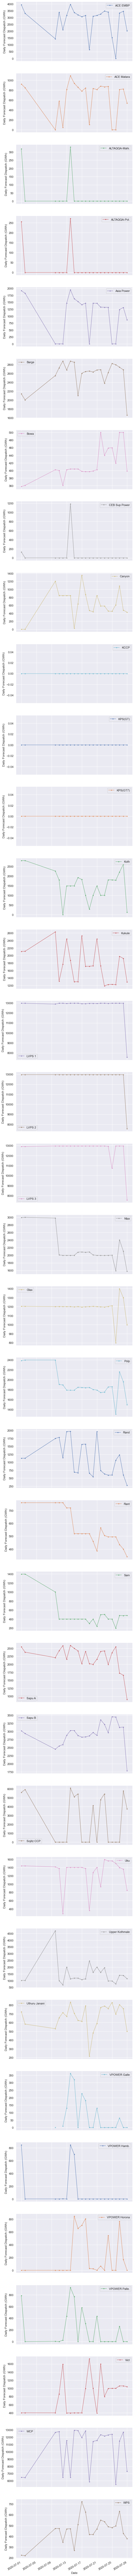

In [45]:
cols_plot = ['ACE EMBP', 'ACE Matara', 'ALTAQQA-Mahi.', 'ALTAQQA-Pol.', 'Asia Power',
       'Barge', 'Bowa', 'CEB Sup Power', 'Canyon', 'KCCP', 'KPS(GT)',
       'KPS(GT7)', 'Koth', 'Kukule', 'LVPS 1', 'LVPS 2', 'LVPS 3', 'Nlax',
       'Olax', 'Polp', 'Rand', 'Rant', 'Sam', 'Sapu A', 'Sapu B', 'Sojitz CCP',
       'Uku', 'Upper Kothmale', 'Uthuru Janani', 'VPOWER Galle',
       'VPOWER Hamb.', 'VPOWER Horona', 'VPOWER Palle.', 'Vict', 'WCP', 'WPS']
axes = data2[cols_plot].plot(marker='.', alpha=0.7, linestyle='-', figsize=(8, 200), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Forecast Dispatch (GWh)')

#### 2.3) Difference of Total Dispatch for every day ( Plant - wise)

In [46]:
data3 = df_sum2.pivot(index="Date", columns="Plant", values="sum(difference)")
data3

Plant       ACE EMBP  ACE Matara  ALTAQQA-Mahi.  ALTAQQA-Pol.  Asia Power  \
Date                                                                        
2020-07-01    2747.0       592.0         -320.0        -256.0       958.0   
2020-07-02    3541.0       521.0            0.0           0.0       771.0   
2020-07-10    4839.0      1128.0            0.0           0.0      2125.0   
2020-07-11    2977.0      -576.0            0.0           0.0       572.0   
2020-07-12   -2109.0       -48.0            0.0           0.0         0.0   
2020-07-13    3524.0       896.0          530.0         448.0      1424.0   
2020-07-14    4012.0       676.0         -209.0         288.0      1597.0   
2020-07-15    3982.0       743.0            0.0           0.0      -237.0   
2020-07-16    3680.0       776.0            0.0           0.0      -243.0   
2020-07-17    3817.0       854.0            0.0           0.0      -126.0   
2020-07-18    3615.0       648.0            0.0           0.0       433.0   
2020-07-19    3767.0       520.0            0.0           0.0         0.0   
2020-07-20    1832.0        32.0            0.0           0.0      -820.0   
2020-07-21    3304.0       618.0            0.0           0.0        16.0   
2020-07-22    3263.0       704.0           40.0          56.0      1011.0   
2020-07-23    2770.0       648.0            0.0           0.0       544.0   
2020-07-24    3335.0       784.0            0.0           0.0       916.0   
2020-07-25    4695.0      1412.0            0.0           0.0        20.0   
2020-07-26    6058.0         0.0            0.0           0.0         0.0   
2020-07-27    3566.0       918.0          220.0         192.0      1058.0   
2020-07-28    3776.0       859.0          540.0         400.0      1169.0   
2020-07-29    2051.0       400.0            0.0           0.0      -172.0   

Plant        Barge    Bowa  CEB Sup Power  Canyon  KCCP  ...     Uku  \
Date                                                     ...           
2020-07-01  2364.0   415.0         -130.0  1697.0   0.0  ...  1520.0   
2020-07-02  3092.0  1070.0            0.0  1622.0   0.0  ...  1455.0   
2020-07-10  1966.0   603.0            0.0   855.0   0.0  ...  1408.0   
2020-07-11  2046.0   385.0          272.0   588.0   0.0  ...  1259.0   
2020-07-12  1829.0   254.0            0.0   376.0   0.0  ...   652.0   
2020-07-13  2767.0   380.0         2062.0   518.0   0.0  ...  1111.0   
2020-07-14  2928.0   518.0         1166.0   632.0   0.0  ...  1338.0   
2020-07-15  2140.0   397.0          466.0  1704.0   0.0  ...  1385.0   
2020-07-16  2103.0   381.0            0.0    54.0   0.0  ...  1031.0   
2020-07-17  1597.0   387.0            0.0  -666.0   0.0  ...  1030.0   
2020-07-18  2680.0   521.0            0.0     4.0   0.0  ...  1153.0   
2020-07-19  2847.0   666.0            0.0   385.0   0.0  ...   524.0   
2020-07-20  2191.0   344.0            0.0   278.0   0.0  ...  1614.0   
2020-07-21  2669.0   761.0            0.0   718.0   0.0  ...  1204.0   
2020-07-22  2625.0   325.0            0.0   722.0   0.0  ...   760.0   
2020-07-23  1662.0   267.0            0.0   160.0   0.0  ...   883.0   
2020-07-24  1951.0   392.0            0.0   650.0   0.0  ...   571.0   
2020-07-25  2707.0   434.0            0.0   925.0   0.0  ...   810.0   
2020-07-26  2779.0   277.0            0.0    95.0   0.0  ...   984.0   
2020-07-27  2752.0   158.0          788.0   476.0   0.0  ...   922.0   
2020-07-28  2785.0   344.0         1980.0   591.0   0.0  ...   962.0   
2020-07-29   909.0   273.0            0.0  -215.0   0.0  ...   809.0   

Plant       Upper Kothmale  Uthuru Janani  VPOWER Galle  VPOWER Hamb.  \
Date                                                                    
2020-07-01           371.0          620.0           NaN        -845.0   
2020-07-02          3413.0          785.0           NaN           0.0   
2020-07-10         -2562.0          985.0           0.0           0.0   
2020-07-11           961.0          117.0           NaN  

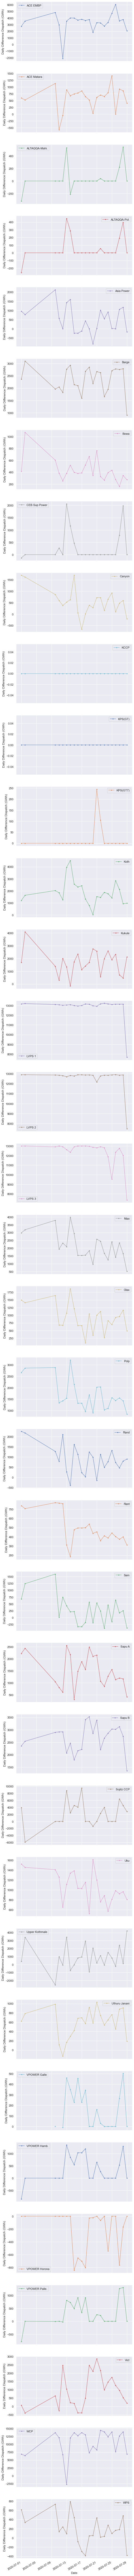

In [47]:
cols_plot = ['ACE EMBP', 'ACE Matara', 'ALTAQQA-Mahi.', 'ALTAQQA-Pol.', 'Asia Power',
       'Barge', 'Bowa', 'CEB Sup Power', 'Canyon', 'KCCP', 'KPS(GT)',
       'KPS(GT7)', 'Koth', 'Kukule', 'LVPS 1', 'LVPS 2', 'LVPS 3', 'Nlax',
       'Olax', 'Polp', 'Rand', 'Rant', 'Sam', 'Sapu A', 'Sapu B', 'Sojitz CCP',
       'Uku', 'Upper Kothmale', 'Uthuru Janani', 'VPOWER Galle',
       'VPOWER Hamb.', 'VPOWER Horona', 'VPOWER Palle.', 'Vict', 'WCP', 'WPS']
axes = data3[cols_plot].plot(marker='.', alpha=0.7, linestyle='-', figsize=(8, 200), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Difference Dispatch (GWh)')

### Time series data analysis - 30 min

#### 3.1) Actual Dispaches , Forecast dispatches , Difference

In [48]:
sum3 = train_df.groupBy("Time").sum("Dis_Actual","Dis_Forcst","difference").sort(col("Time").asc())

In [49]:
sum3.show()

+-----+---------------+---------------+---------------+
| Time|sum(Dis_Actual)|sum(Dis_Forcst)|sum(difference)|
+-----+---------------+---------------+---------------+
| 0:00|        57364.0|        28985.0|        28379.0|
| 0:30|        55774.0|        28192.0|        27582.0|
|10:00|        80271.0|        40528.0|        39743.0|
|10:30|        81810.0|        41365.0|        40445.0|
|11:00|        83131.0|        42228.0|        40903.0|
|11:30|        83601.0|        42458.0|        41143.0|
|12:00|        82541.0|        42085.0|        40456.0|
|12:30|        79410.0|        41047.0|        38363.0|
|13:00|        78057.0|        39972.0|        38085.0|
|13:30|        77769.0|        39853.0|        37916.0|
|14:00|        78658.0|        40381.0|        38277.0|
|14:30|        79438.0|        41055.0|        38383.0|
|15:00|        79028.0|        40924.0|        38104.0|
|15:30|        79839.0|        41505.0|        38334.0|
|16:00|        79897.0|        41712.0|        3

In [50]:
sum3 = sum3.toPandas()

In [51]:
sns.set(rc={'figure.figsize':(30, 20)})

In [52]:
positions = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47)
labels = ('00:00','00:30','01:00','01:30','02:00','02:30','03:00','03:30','04:00','04:30','05:00','05:30','06:00','06:30','07:00','07:30','08:00','08:30','09:00','09:30','10:00','10:30','11:00','11:30','12:00','12:30','13:00','13:30','14:00','14:30','15:00','15:30','16:00','16:30','17:00','17:30','18:00','18:30','19:00','19:30','20:00','20:30','21:00','21:30','22:00','22:30','23:00','23:30')

Text(0.5, 0, 'Time')

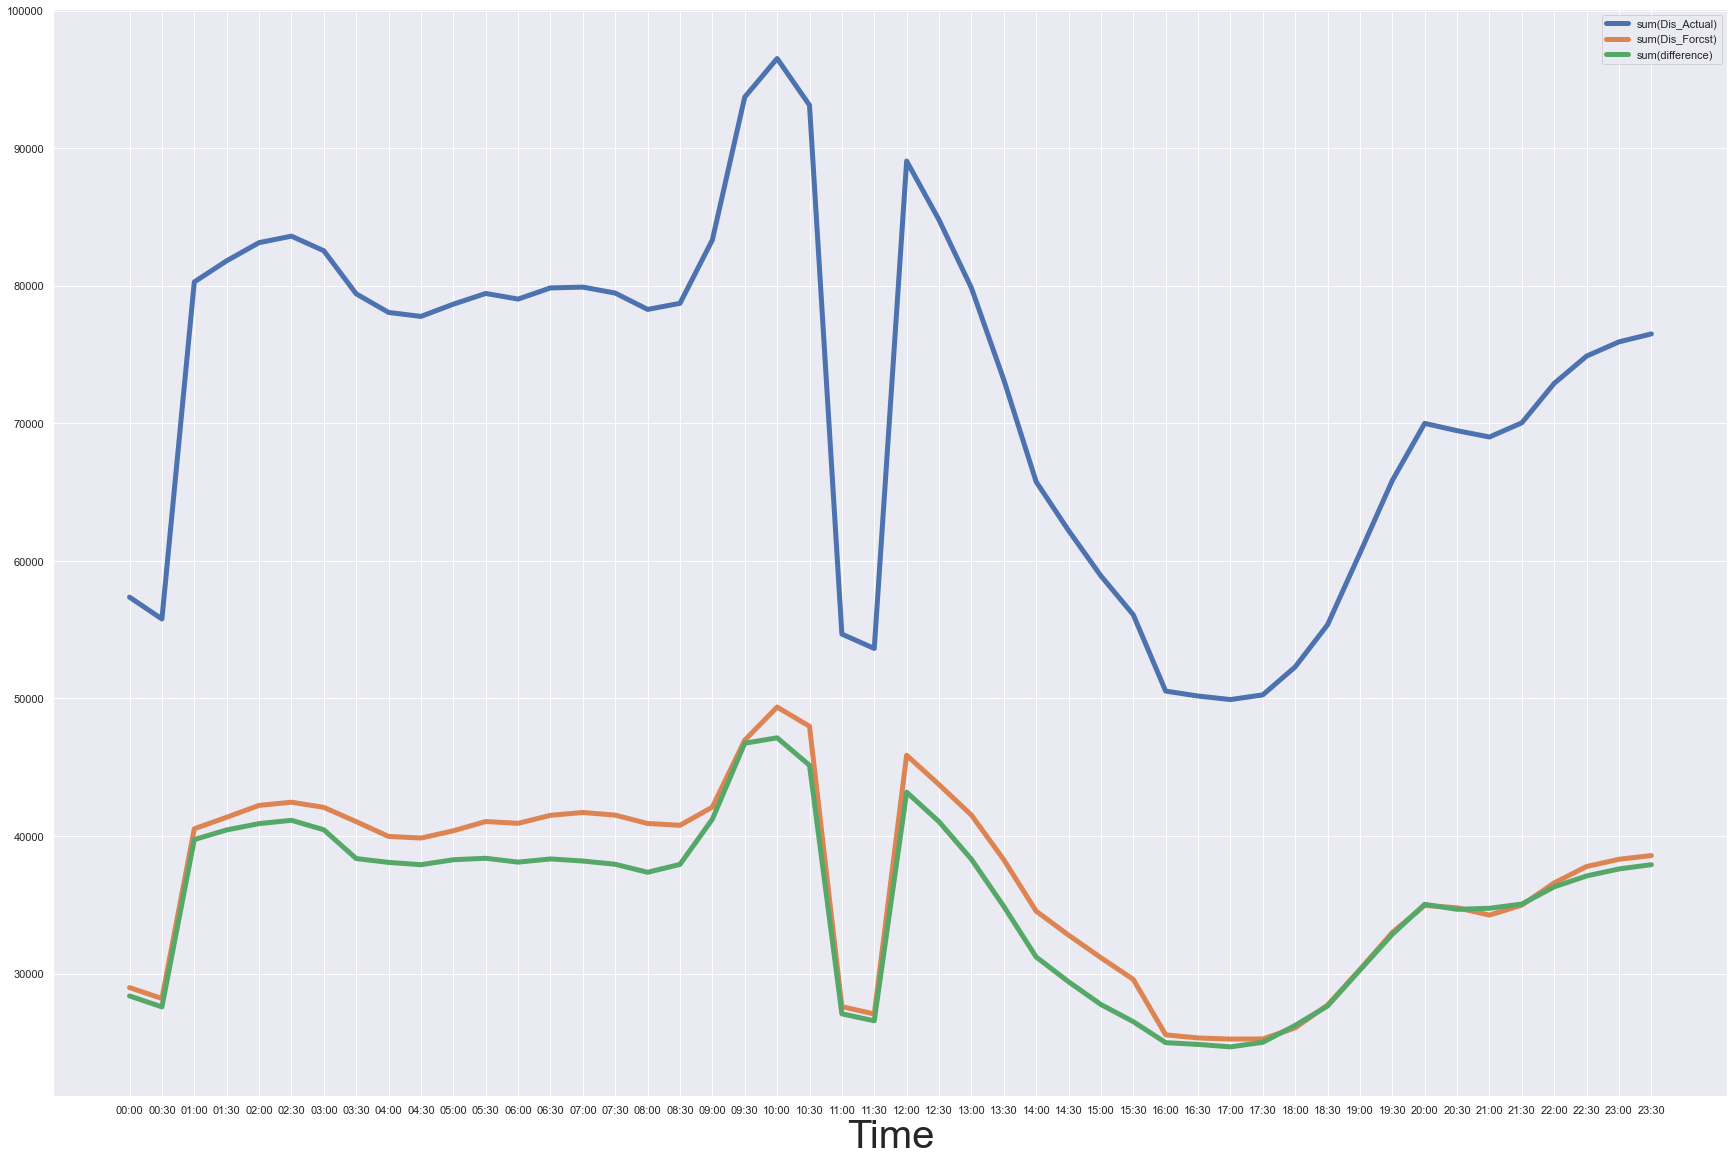

In [53]:
sum3[['sum(Dis_Actual)','sum(Dis_Forcst)','sum(difference)']].plot(linewidth=5);
plt.xticks(positions, labels)
plt.xlabel('Time', fontsize=40)

#### 3.2) Plant-wise actual dispatches

In [54]:
sum4 = train_df.groupBy("Plant","Time").sum("Dis_Actual","Dis_Forcst","difference").sort(col("Time").asc() , col("Plant").asc())

In [55]:
df_sum3 = sum4.toPandas()

In [56]:
data4 = df_sum3.pivot(index="Time", columns="Plant", values="sum(Dis_Actual)")
data4

Plant  ACE EMBP  ACE Matara  ALTAQQA-Mahi.  ALTAQQA-Pol.  Asia Power   Barge  \
Time                                                                           
0:00      966.0         0.0            0.0           0.0       133.0  2054.0   
0:30      798.0         0.0            0.0           0.0        89.0  1873.0   
10:00    3527.0       804.0           40.0          48.0      1134.0  2486.0   
10:30    3500.0       828.0           40.0          48.0      1135.0  2466.0   
11:00    3471.0       852.0           40.0          56.0      1129.0  2487.0   
11:30    3441.0       852.0           50.0          64.0      1121.0  2468.0   
12:00    3460.0       852.0           60.0          64.0      1105.0  2409.0   
12:30    3391.0       852.0           50.0          64.0      1095.0  2444.0   
13:00    3360.0       852.0           40.0          48.0      1088.0  2407.0   
13:30    3356.0       852.0           40.0          48.0      1074.0  2336.0   
14:00    3364.0       852.0           40.0          48.0      1034.0  2254.0   
14:30    3355.0       828.0           40.0          48.0      1032.0  2253.0   
15:00    3339.0       804.0           40.0          48.0      1015.0  2261.0   
15:30    3351.0       804.0           40.0          48.0      1005.0  2329.0   
16:00    3426.0       804.0           40.0          48.0       993.0  2405.0   
16:30    3478.0       828.0           60.0          48.0       994.0  2440.0   
17:00    3521.0       864.0           60.0          64.0      1000.0  2432.0   
17:30    3556.0       864.0           60.0          64.0      1002.0  2440.0   
18:00    3642.0       864.0           60.0          64.0      1003.0  2439.0   
18:30    3694.0       864.0           60.0          64.0       998.0  2467.0   
19:00    3722.0       864.0           60.0          64.0      1001.0  2516.0   
19:30    3774.0       840.0           60.0          64.0       928.0  2556.0   
1:00      795.0         0.0            0.0           0.0        76.0  1662.0   
1:30      779.0         0.0            0.0           0.0        76.0  1555.0   
20:00    3792.0       816.0           60.0          64.0       870.0  2581.0   
20:30    3758.0       816.0           60.0          64.0       846.0  2575.0   
21:00    3601.0       792.0           60.0          64.0       786.0  2606.0   
21:30    3421.0       696.0           50.0          64.0       694.0  2591.0   
22:00    2647.0       504.0           20.0          48.0       538.0  2443.0   
22:30    2345.0       346.0            0.0          40.0       417.0  2325.0   
23:00    2030.0       240.0            0.0           0.0       329.0  2180.0   
23:30    1448.0        24.0            0.0           0.0       205.0  2053.0   
2:00      760.0         0.0            0.0           0.0        76.0  1436.0   
2:30      726.0         0.0            0.0           0.0        76.0  1377.0   
3:00      702.0         0.0            0.0           0.0        76.0  1430.0   
3:30      728.0         0.0            0.0           0.0        76.0  1468.0   
4:00      889.0         0.0            0.0           0.0       110.0  1588.0   
4:30     1759.0         0.0            0.0           0.0       190.0  1971.0   
5:00     2698.0       233.0           10.0           0.0       289.0  2240.0   
5:30     3271.0       442.0           20.0          16.0       387.0  2401.0   
6:00     3381.0       617.0           20.0          16.0       529.0  2423.0   
6:30     3388.0       624.0           20.0          16.0       731.0  2412.0   
7:00     3342.0       624.0           20.0          16.0       868.0  2418.0   
7:30     3321.0       708.0           20.0          16.0       957.0  2395.0   
8:00     3331.0       756.0           21.0          16.0       999.0  2367.0   
8:30     3314.0       756.0           20.0          24.0      1043.0  2377.0   
9:00     3339.0       756.0           30.0          32.0      1078.0  2360.0   
9:30     3352.0       756.0           40.0          48.0      1083.0  2370.0   


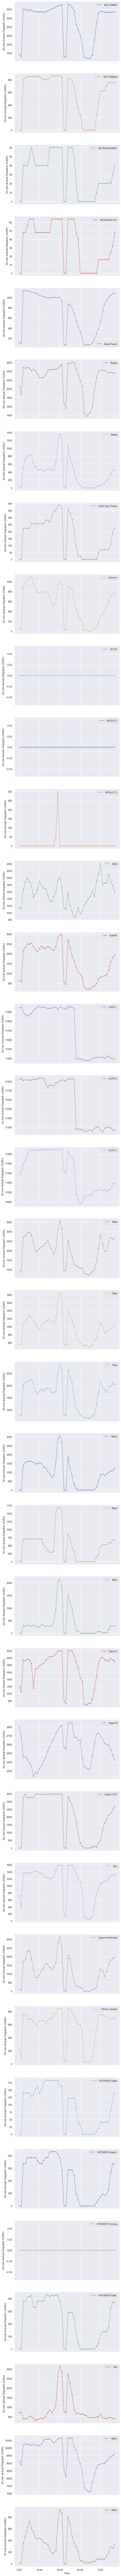

In [57]:
cols_plot = ['ACE EMBP', 'ACE Matara', 'ALTAQQA-Mahi.', 'ALTAQQA-Pol.', 'Asia Power',
       'Barge', 'Bowa', 'CEB Sup Power', 'Canyon', 'KCCP', 'KPS(GT)',
       'KPS(GT7)', 'Koth', 'Kukule', 'LVPS 1', 'LVPS 2', 'LVPS 3', 'Nlax',
       'Olax', 'Polp', 'Rand', 'Rant', 'Sam', 'Sapu A', 'Sapu B', 'Sojitz CCP',
       'Uku', 'Upper Kothmale', 'Uthuru Janani', 'VPOWER Galle',
       'VPOWER Hamb.', 'VPOWER Horona', 'VPOWER Palle.', 'Vict', 'WCP', 'WPS']
axes = data4[cols_plot].plot(marker='.', alpha=0.7, linestyle='-', figsize=(8, 200), subplots=True)
for ax in axes:
    ax.set_ylabel('30-min Actual Dispatch (GWh)')

#### 3.3) Plant-wise Forecast Dispatches

In [58]:
data5 = df_sum3.pivot(index="Time", columns="Plant", values="sum(Dis_Forcst)")
data5

Plant  ACE EMBP  ACE Matara  ALTAQQA-Mahi.  ALTAQQA-Pol.  Asia Power   Barge  \
Time                                                                           
0:00      441.0        48.0            0.0           8.0       103.0  1178.0   
0:30      302.0        24.0            0.0           0.0       103.0  1023.0   
10:00    1586.0       400.0           20.0          16.0       636.0  1260.0   
10:30    1586.0       400.0           20.0          16.0       636.0  1260.0   
11:00    1592.0       400.0           20.0          16.0       636.0  1260.0   
11:30    1600.0       400.0           20.0          16.0       636.0  1260.0   
12:00    1590.0       400.0           20.0          16.0       636.0  1260.0   
12:30    1588.0       392.0           20.0          16.0       636.0  1260.0   
13:00    1588.0       400.0           20.0          16.0       636.0  1260.0   
13:30    1588.0       400.0           20.0          16.0       636.0  1260.0   
14:00    1600.0       400.0           20.0          16.0       636.0  1260.0   
14:30    1613.0       400.0           20.0          16.0       636.0  1260.0   
15:00    1615.0       400.0           20.0          16.0       636.0  1260.0   
15:30    1601.0       400.0           20.0          16.0       636.0  1260.0   
16:00    1598.0       400.0           20.0          16.0       636.0  1260.0   
16:30    1603.0       400.0           20.0          16.0       636.0  1260.0   
17:00    1611.0       400.0           20.0          16.0       636.0  1260.0   
17:30    1633.0       400.0           20.0          16.0       636.0  1260.0   
18:00    1607.0       396.0           20.0          16.0       636.0  1275.0   
18:30    1735.0       412.0           20.0          16.0       636.0  1275.0   
19:00    1745.0       444.0           20.0          16.0       636.0  1275.0   
19:30    1735.0       436.0           20.0          16.0       636.0  1275.0   
1:00      253.0        16.0            0.0           0.0       101.0   939.0   
1:30      266.0        24.0            0.0           0.0       103.0   893.0   
20:00    1745.0       420.0           20.0          16.0       636.0  1275.0   
20:30    1741.0       420.0           20.0          16.0       636.0  1275.0   
21:00    1697.0       396.0           20.0          16.0       636.0  1275.0   
21:30    1655.0       396.0           10.0           8.0       636.0  1275.0   
22:00    1542.0       355.0            0.0           0.0       587.0  1204.0   
22:30    1426.0       275.0            0.0           0.0       550.0  1195.0   
23:00    1176.0       200.0            0.0           0.0       365.0  1204.0   
23:30     625.0       168.0            0.0           0.0       319.0  1118.0   
2:00      252.0        16.0            0.0           0.0        94.0   881.0   
2:30      246.0        16.0            0.0           0.0        94.0   863.0   
3:00      226.0        16.0            0.0           0.0        94.0   823.0   
3:30      212.0        16.0            0.0           0.0        94.0   815.0   
4:00      245.0        16.0            0.0           0.0        94.0   855.0   
4:30      374.0        57.0            0.0           0.0       145.0  1017.0   
5:00     1015.0        72.0            0.0           0.0       169.0  1194.0   
5:30     1406.0       288.0           20.0          16.0       481.0  1215.0   
6:00     1521.0       343.0           20.0          16.0       563.0  1215.0   
6:30     1534.0       368.0           20.0          16.0       599.0  1215.0   
7:00     1517.0       333.0           20.0          16.0       580.0  1215.0   
7:30     1517.0       364.0           20.0          16.0       595.0  1215.0   
8:00     1517.0       372.0           20.0          16.0       600.0  1200.0   
8:30     1500.0       374.0           20.0          16.0       600.0  1200.0   
9:00     1500.0       376.0           20.0          16.0       600.0  1200.0   
9:30     1502.0       376.0           20.0          16.0       600.0  1200.0   


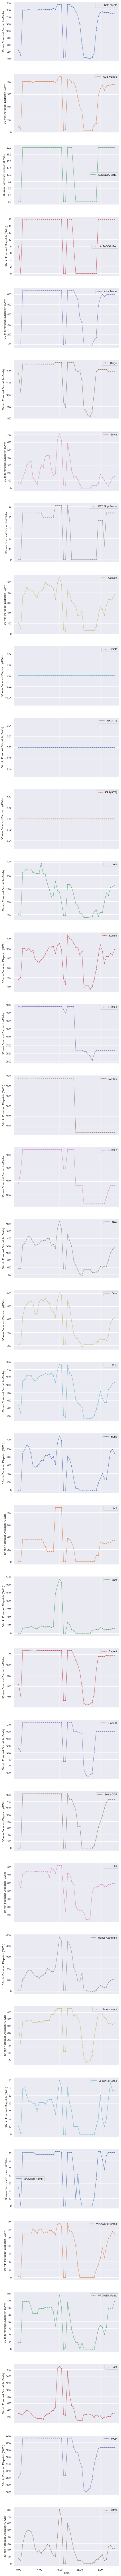

In [59]:
cols_plot = ['ACE EMBP', 'ACE Matara', 'ALTAQQA-Mahi.', 'ALTAQQA-Pol.', 'Asia Power',
       'Barge', 'Bowa', 'CEB Sup Power', 'Canyon', 'KCCP', 'KPS(GT)',
       'KPS(GT7)', 'Koth', 'Kukule', 'LVPS 1', 'LVPS 2', 'LVPS 3', 'Nlax',
       'Olax', 'Polp', 'Rand', 'Rant', 'Sam', 'Sapu A', 'Sapu B', 'Sojitz CCP',
       'Uku', 'Upper Kothmale', 'Uthuru Janani', 'VPOWER Galle',
       'VPOWER Hamb.', 'VPOWER Horona', 'VPOWER Palle.', 'Vict', 'WCP', 'WPS']
axes = data5[cols_plot].plot(marker='.', alpha=0.7, linestyle='-', figsize=(8, 200), subplots=True)
for ax in axes:
    ax.set_ylabel('30-min Forecast Dispatch (GWh)')

### Time series data analysis - Weekly

#### 4.1) Actual dispatches , Forecast Dispatches and Difference

In [60]:
sum10 = train_df.groupBy("Date","Plant").sum("Dis_Actual" , "Dis_Forcst" , "difference").sort(col("Date").asc() , col("Plant").asc())

In [61]:
sum10.show()

+--------+-------------+---------------+---------------+---------------+
|    Date|        Plant|sum(Dis_Actual)|sum(Dis_Forcst)|sum(difference)|
+--------+-------------+---------------+---------------+---------------+
|7/1/2020|     ACE EMBP|         6679.0|         3932.0|         2747.0|
|7/1/2020|   ACE Matara|         1512.0|          920.0|          592.0|
|7/1/2020|ALTAQQA-Mahi.|            0.0|          320.0|         -320.0|
|7/1/2020| ALTAQQA-Pol.|            0.0|          256.0|         -256.0|
|7/1/2020|   Asia Power|         2875.0|         1917.0|          958.0|
|7/1/2020|        Barge|         4505.0|         2141.0|         2364.0|
|7/1/2020|         Bowa|          773.0|          358.0|          415.0|
|7/1/2020|CEB Sup Power|            0.0|          130.0|         -130.0|
|7/1/2020|       Canyon|         1697.0|            0.0|         1697.0|
|7/1/2020|         KCCP|            0.0|            0.0|            0.0|
|7/1/2020|      KPS(GT)|            0.0|           

In [62]:
sum10 = sum10.toPandas()

In [63]:
sum10["Date"] = pd.to_datetime(sum10["Date"])

In [64]:
sum10.dtypes

Date               datetime64[ns]
Plant                      object
sum(Dis_Actual)           float64
sum(Dis_Forcst)           float64
sum(difference)           float64
dtype: object

In [65]:
df_sum10 = sum10.pivot(index="Date", columns="Plant", values="sum(Dis_Actual)")
df_sum10.head()

Plant       ACE EMBP  ACE Matara  ALTAQQA-Mahi.  ALTAQQA-Pol.  Asia Power  \
Date                                                                        
2020-07-01    6679.0      1512.0            0.0           0.0      2875.0   
2020-07-02    6845.0      1368.0            0.0           0.0      2597.0   
2020-07-10    6278.0      1128.0            0.0           0.0      2125.0   
2020-07-11    6363.0         0.0            0.0           0.0       572.0   
2020-07-12       0.0         0.0            0.0           0.0         0.0   

Plant        Barge    Bowa  CEB Sup Power  Canyon  KCCP  ...     Uku  \
Date                                                     ...           
2020-07-01  4505.0   773.0            0.0  1697.0   0.0  ...  2960.0   
2020-07-02  5096.0  1431.0            0.0  1622.0   0.0  ...  2895.0   
2020-07-10  4519.0  1005.0            0.0  2057.0   0.0  ...  2824.0   
2020-07-11  4773.0   785.0          272.0  1435.0   0.0  ...  2634.0   
2020-07-12  4709.0   615.0            0.0  1222.0   0.0  ...   940.0   

Plant       Upper Kothmale  Uthuru Janani  VPOWER Galle  VPOWER Hamb.  \
Date                                                                    
2020-07-01          1389.0         1344.0           NaN           0.0   
2020-07-02          4424.0         1367.0           NaN           0.0   
2020-07-10          2132.0         1515.0           0.0           0.0   
2020-07-11          1957.0          771.0           NaN           0.0   
2020-07-12           604.0          581.0           0.0           0.0   

Plant       VPOWER Horona  VPOWER Palle.    Vict      WCP     WPS  
Date                                                               
2020-07-01            0.0            0.0   465.0  13324.0   835.0  
2020-07-02            0.0            0.0     0.0  12841.0   555.0  
2020-07-10            0.0            0.0  1027.0  26340.0  1204.0  
2020-07-11            0.0            0.0   591.0  24853.0   610.0  
2020-07-12            0.0            0.0  4058.0  13192.0   585.0  

[5 rows x 36 columns]

In [66]:
sum10_new = df_sum10[cols_plot].resample('W').sum()

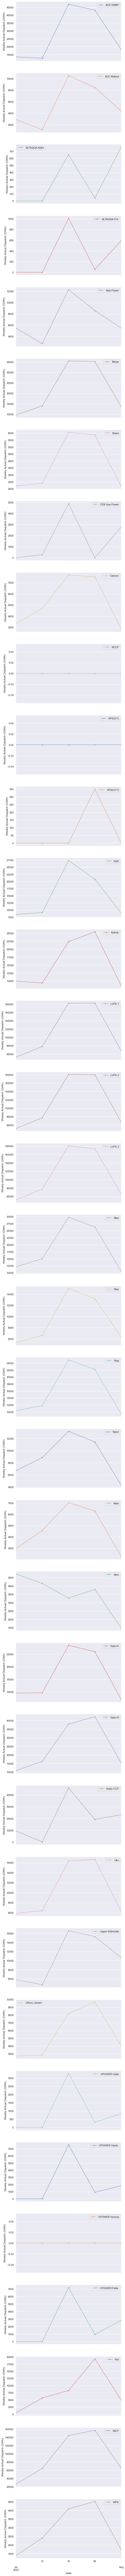

In [67]:
cols_plot = ['ACE EMBP', 'ACE Matara', 'ALTAQQA-Mahi.', 'ALTAQQA-Pol.', 'Asia Power',
       'Barge', 'Bowa', 'CEB Sup Power', 'Canyon', 'KCCP', 'KPS(GT)',
       'KPS(GT7)', 'Koth', 'Kukule', 'LVPS 1', 'LVPS 2', 'LVPS 3', 'Nlax',
       'Olax', 'Polp', 'Rand', 'Rant', 'Sam', 'Sapu A', 'Sapu B', 'Sojitz CCP',
       'Uku', 'Upper Kothmale', 'Uthuru Janani', 'VPOWER Galle',
       'VPOWER Hamb.', 'VPOWER Horona', 'VPOWER Palle.', 'Vict', 'WCP', 'WPS']
axes = sum10_new[cols_plot].plot(marker='.', alpha=0.7, linestyle='-', figsize=(8,200), subplots=True)
for ax in axes:
    ax.set_ylabel('Weekly Actual Dispatch (GWh)')

### Time series data analysis - Hourly

In [68]:
sum11 = train_df.groupBy('Time').sum('Dis_Actual' , 'Dis_Forcst' , 'difference').sort(col('Time').asc())
sum11.show()

+-----+---------------+---------------+---------------+
| Time|sum(Dis_Actual)|sum(Dis_Forcst)|sum(difference)|
+-----+---------------+---------------+---------------+
| 0:00|        57364.0|        28985.0|        28379.0|
| 0:30|        55774.0|        28192.0|        27582.0|
|10:00|        80271.0|        40528.0|        39743.0|
|10:30|        81810.0|        41365.0|        40445.0|
|11:00|        83131.0|        42228.0|        40903.0|
|11:30|        83601.0|        42458.0|        41143.0|
|12:00|        82541.0|        42085.0|        40456.0|
|12:30|        79410.0|        41047.0|        38363.0|
|13:00|        78057.0|        39972.0|        38085.0|
|13:30|        77769.0|        39853.0|        37916.0|
|14:00|        78658.0|        40381.0|        38277.0|
|14:30|        79438.0|        41055.0|        38383.0|
|15:00|        79028.0|        40924.0|        38104.0|
|15:30|        79839.0|        41505.0|        38334.0|
|16:00|        79897.0|        41712.0|        3

In [69]:
sum11 = sum11.toPandas()

In [70]:
sum11 = sum11.T

In [71]:
new_header = sum11.iloc[0] #grab the first row for the header
sum11 = sum11[1:] #take the data less the header row
sum11.columns = new_header #set the header row as the df header

In [72]:
i=0
while i<47:
    sum11[i] = sum11.iloc[:, i:(i+2)].sum(axis=1)
    i=i+2

In [73]:
sum11 = sum11.drop(sum11.columns[0:48], axis =1)
sum11

Time                   0         2         4         6         8         10  \
sum(Dis_Actual)  113138.0  162081.0  166732.0  161951.0  155826.0  158096.0   
sum(Dis_Forcst)   57177.0   81893.0   84686.0   83132.0   79825.0   81436.0   
sum(difference)   55961.0   80188.0   82046.0   78819.0   76001.0   76660.0   

Time                   12        14        16        18  ...        28  \
sum(Dis_Actual)  158867.0  159362.0  156996.0  177038.0  ...  127961.0   
sum(Dis_Forcst)   82429.0   83230.0   81692.0   89069.0  ...   67342.0   
sum(difference)   76438.0   76132.0   75304.0   87969.0  ...   60619.0   

Time                   30        32        34        36        38        40  \
sum(Dis_Actual)  114996.0  100712.0  100179.0  107653.0  126410.0  139455.0   
sum(Dis_Forcst)   60734.0   50875.0   50497.0   53770.0   63292.0   69744.0   
sum(difference)   54262.0   49837.0   49682.0   53883.0   63118.0   69711.0   

Time                   42        44        46  
sum(Dis_Actual)  139037.0  147785.0  152415.0  
sum(Dis_Forcst)   69233.0   74378.0   76889.0  
sum(difference)   69804.0   73407.0   75526.0  

[3 rows x 24 columns]

In [74]:
#### Re-name column names
sum11.columns = ['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00']
sum11

00:00     01:00     02:00     03:00     04:00     05:00  \
sum(Dis_Actual)  113138.0  162081.0  166732.0  161951.0  155826.0  158096.0   
sum(Dis_Forcst)   57177.0   81893.0   84686.0   83132.0   79825.0   81436.0   
sum(difference)   55961.0   80188.0   82046.0   78819.0   76001.0   76660.0   

                    06:00     07:00     08:00     09:00  ...     14:00  \
sum(Dis_Actual)  158867.0  159362.0  156996.0  177038.0  ...  127961.0   
sum(Dis_Forcst)   82429.0   83230.0   81692.0   89069.0  ...   67342.0   
sum(difference)   76438.0   76132.0   75304.0   87969.0  ...   60619.0   

                    15:00     16:00     17:00     18:00     19:00     20:00  \
sum(Dis_Actual)  114996.0  100712.0  100179.0  107653.0  126410.0  139455.0   
sum(Dis_Forcst)   60734.0   50875.0   50497.0   53770.0   63292.0   69744.0   
sum(difference)   54262.0   49837.0   49682.0   53883.0   63118.0   69711.0   

                    21:00     22:00     23:00  
sum(Dis_Actual)  139037.0  147785.0  152415.0  
sum(Dis_Forcst)   69233.0   74378.0   76889.0  
sum(difference)   69804.0   73407.0   75526.0  

[3 rows x 24 columns]

In [75]:
sum11 = sum11.T
sum11.head()

sum(Dis_Actual)  sum(Dis_Forcst)  sum(difference)
00:00         113138.0          57177.0          55961.0
01:00         162081.0          81893.0          80188.0
02:00         166732.0          84686.0          82046.0
03:00         161951.0          83132.0          78819.0
04:00         155826.0          79825.0          76001.0

In [76]:
sns.set(rc={'figure.figsize':(20, 10)})

In [77]:
positions = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
labels = ('00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00')

Text(0.5, 0, 'Time')

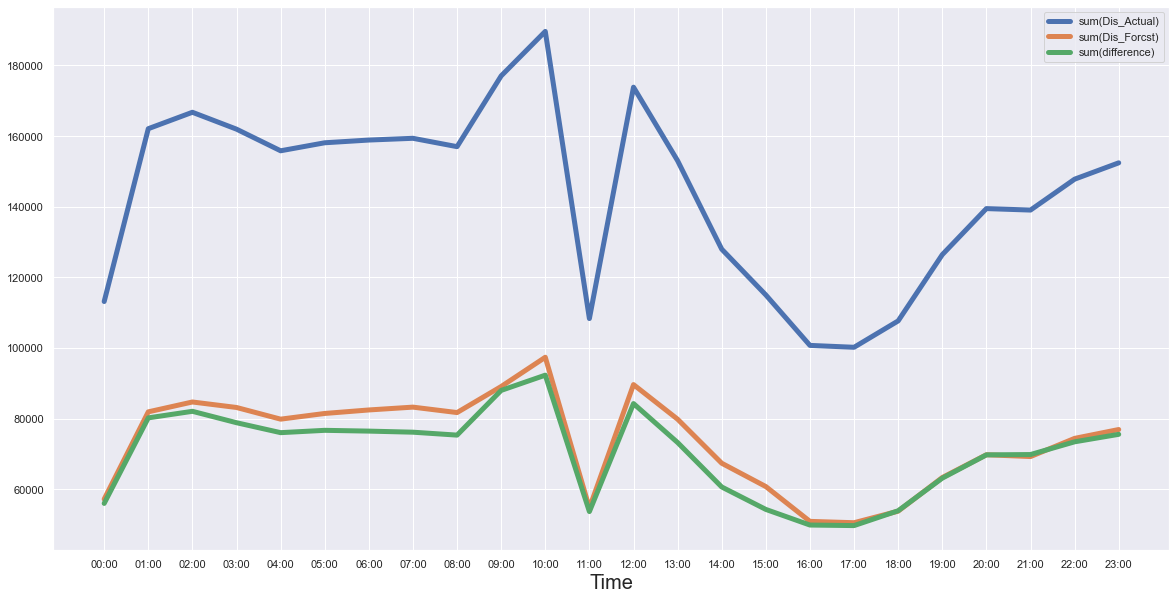

In [78]:
sum11[['sum(Dis_Actual)','sum(Dis_Forcst)','sum(difference)']].plot(linewidth=5);
plt.xticks(positions, labels)
plt.xlabel('Time', fontsize=20)